In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [182]:
df = pd.read_csv('last.csv')

In [183]:
df

,index_month_4,index_month_5,index_month_6,index_month_7,index_month_8,elevation,culture_name
0,-0.047,-0.298,-0.293,0.1480,0.105,724,0
1,0.016,0.270,0.298,0.2600,0.757,729,1
2,-0.034,-0.258,-0.017,0.1310,-0.086,626,2
3,0.068,-0.186,-0.112,0.2860,0.120,619,1
4,0.110,0.439,-0.300,-0.0200,0.211,966,2
...,...,...,...,...,...,...,...
273,0.058,-0.223,0.284,-0.0024,0.187,770,0
274,0.013,0.042,0.054,0.1520,0.035,763,0
275,0.028,0.006,0.064,0.1730,0.037,940,0
276,-0.059,0.132,0.147,0.1730,0.061,940,0


In [184]:
df['culture_name'].value_counts()

2    69
3    60
4    55
0    54
1    28
7    12
Name: culture_name, dtype: int64

In [185]:
class_counts = df['culture_name'].value_counts()
valid_classes = class_counts[class_counts > 30].index.tolist()

# Filter the DataFrame to keep only rows with valid classes
filtered_df = df[df['culture_name'].isin(valid_classes)]

In [186]:
filtered_df['culture_name'].value_counts()

2    69
3    60
4    55
0    54
Name: culture_name, dtype: int64

In [173]:
from sklearn.ensemble import IsolationForest

# Assuming 'df' is your DataFrame
# Drop the 'culture_name' column as it's not needed for anomaly detection
df_time = filtered_df.copy()

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# Fit the model to your data
iso_forest.fit(df_time)

# Predict the anomalies (1 for inliers, -1 for outliers)
anomaly_predictions = iso_forest.predict(df_time)

# Create a mask to filter out anomalies
is_inlier = anomaly_predictions == 1

# Filter the DataFrame to keep only the inliers (non-anomalies)
df_woutanns = df_time[is_inlier]

In [174]:
df_woutanns['culture_name'].value_counts()

2    69
3    60
4    55
0    54
1    28
7    12
Name: culture_name, dtype: int64

In [135]:
test_df = df_woutanns[:30:]

In [136]:
df_woutanns = df_woutanns.drop(labels=range(0, 30))

In [175]:
df_woutanns.to_csv('last.csv', index=False)

In [200]:
pd.DataFrame(clf_setup.y_test).value_counts()

culture_name
2               21
3               18
4               17
0               16
dtype: int64

In [187]:
# Initialize the PyCaret setup
clf_setup = setup(data=filtered_df, target='culture_name', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,7219
1,Target,culture_name
2,Target type,Multiclass
3,Target mapping,"0: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(238, 7)"
5,Transformed data shape,"(238, 7)"
6,Transformed train set shape,"(166, 7)"
7,Transformed test set shape,"(72, 7)"
8,Numeric features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [157]:
# Compare models to find the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.4433,0.7056,0.4433,0.4219,0.4073,0.2802,0.2903,0.2200
nb,Naive Bayes,0.4357,0.7181,0.4357,0.4465,0.4146,0.2764,0.2900,0.0130
rf,Random Forest Classifier,0.4300,0.7115,0.4300,0.3757,0.3825,0.2573,0.2706,0.1570
et,Extra Trees Classifier,0.4167,0.7099,0.4167,0.3750,0.3811,0.2437,0.2504,0.1340
ridge,Ridge Classifier,0.4033,0.0000,0.4033,0.2943,0.3236,0.2000,0.2175,0.0120
xgboost,Extreme Gradient Boosting,0.4029,0.7026,0.4029,0.3901,0.3828,0.2334,0.2379,1.4860
lr,Logistic Regression,0.3967,0.6545,0.3967,0.2791,0.3049,0.1854,0.2126,0.0190
qda,Quadratic Discriminant Analysis,0.3829,0.6795,0.3829,0.3616,0.3563,0.2071,0.2141,0.0150
lda,Linear Discriminant Analysis,0.3705,0.6645,0.3705,0.2803,0.3117,0.1653,0.1729,0.0140
lightgbm,Light Gradient Boosting Machine,0.3633,0.6804,0.3633,0.3482,0.3451,0.1787,0.1835,80.6870


In [188]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4706,0.7592,0.4706,0.4647,0.4545,0.2884,0.2925
1,0.4706,0.8166,0.4706,0.4549,0.4594,0.2917,0.2930
2,0.2941,0.6917,0.2941,0.4902,0.3098,0.0727,0.0770
3,0.3529,0.7598,0.3529,0.3725,0.3389,0.1179,0.1247
4,0.3529,0.6836,0.3529,0.3064,0.3083,0.1221,0.1304
5,0.3529,0.7048,0.3529,0.3020,0.3250,0.1302,0.1321
6,0.3750,0.7853,0.3750,0.2812,0.3173,0.1444,0.1520
7,0.3125,0.5883,0.3125,0.3125,0.2887,0.0486,0.0519
8,0.3125,0.6533,0.3125,0.3562,0.3080,0.0974,0.1011


In [139]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4667,0.7119,0.4667,0.4778,0.4635,0.3220,0.3239
1,0.6000,0.8021,0.6000,0.5867,0.5822,0.4706,0.4765
2,0.2667,0.5524,0.2667,0.2000,0.2222,0.0625,0.0651
3,0.4667,0.7215,0.4667,0.5000,0.4333,0.2941,0.3163
4,0.4000,0.8150,0.4000,0.3556,0.3683,0.2373,0.2443
5,0.4000,0.6945,0.4000,0.3667,0.3810,0.2286,0.2299
6,0.1333,0.5829,0.1333,0.0762,0.0970,-0.1207,-0.1294
7,0.4667,0.6830,0.4667,0.4800,0.4619,0.3296,0.3352
8,0.4000,0.6957,0.4000,0.4722,0.4238,0.2416,0.2458


In [140]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.7423,0.5333,0.4476,0.4788,0.3787,0.3962
1,0.5333,0.7628,0.5333,0.5600,0.5044,0.3787,0.3910
2,0.2667,0.6052,0.2667,0.2356,0.2429,0.0625,0.0636
3,0.5333,0.7833,0.5333,0.6044,0.5311,0.4034,0.4105
4,0.4667,0.7629,0.4667,0.5533,0.4368,0.3296,0.3538
5,0.4000,0.6437,0.4000,0.3067,0.3444,0.2151,0.2219
6,0.3333,0.5689,0.3333,0.2500,0.2705,0.1279,0.1394
7,0.3333,0.6782,0.3333,0.2267,0.2667,0.1429,0.1500
8,0.5333,0.7024,0.5333,0.5422,0.5167,0.4034,0.4128


In [141]:
es = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.7617,0.4000,0.3822,0.3873,0.2241,0.2254
1,0.4667,0.8108,0.4667,0.4476,0.4388,0.2899,0.3013
2,0.2667,0.6749,0.2667,0.1967,0.2238,0.0517,0.0533
3,0.4667,0.7107,0.4667,0.4711,0.4635,0.3182,0.3200
4,0.3333,0.7056,0.3333,0.2400,0.2772,0.1525,0.1589
5,0.5333,0.7369,0.5333,0.5000,0.4889,0.3787,0.3965
6,0.2667,0.6652,0.2667,0.1543,0.1955,0.0462,0.0503
7,0.4667,0.6494,0.4667,0.3800,0.4143,0.3220,0.3316
8,0.4667,0.6436,0.4667,0.4133,0.4333,0.2941,0.2995


In [ ]:
ensembled_models = compare_models(models(type='ensemble').index.tolist(), fold = 3)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.4485,0.7269,0.4485,0.4552,0.4334,0.3028,0.3078,0.1333
gbc,Gradient Boosting Classifier,0.4126,0.7156,0.4126,0.4188,0.4024,0.2637,0.2684,0.2533
rf,Random Forest Classifier,0.4071,0.7042,0.4071,0.3983,0.3900,0.2525,0.2577,0.1700
xgboost,Extreme Gradient Boosting,0.3818,0.6938,0.3818,0.3833,0.3746,0.2279,0.2307,1.4667
lightgbm,Light Gradient Boosting Machine,0.3607,0.6881,0.3607,0.3691,0.3504,0.2000,0.2051,93.1867
catboost,CatBoost Classifier,0.3505,0.6900,0.3505,0.3289,0.3321,0.1815,0.1846,9.1500
ada,Ada Boost Classifier,0.2987,0.6407,0.2987,0.3116,0.2953,0.1247,0.1262,0.0533


In [189]:
rf_tuned = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5294,0.7289,0.5294,0.5255,0.5202,0.3674,0.3709
1,0.5882,0.8873,0.5882,0.6127,0.5920,0.4516,0.4558
2,0.4118,0.6399,0.4118,0.6359,0.4473,0.2202,0.2345
3,0.3529,0.7255,0.3529,0.3725,0.3389,0.1179,0.1247
4,0.4118,0.7051,0.4118,0.3456,0.3554,0.2019,0.2157
5,0.4706,0.7187,0.4706,0.4790,0.3980,0.2850,0.3147
6,0.5000,0.7822,0.5000,0.3802,0.4245,0.3191,0.3378
7,0.3125,0.5546,0.3125,0.3125,0.2887,0.0486,0.0519
8,0.3125,0.6202,0.3125,0.2702,0.2734,0.1111,0.1217


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [143]:
gbc_tuned = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4667,0.7786,0.4667,0.5844,0.4852,0.3182,0.3256
1,0.4667,0.7711,0.4667,0.4143,0.4255,0.2899,0.3013
2,0.3333,0.6483,0.3333,0.2489,0.2762,0.1429,0.1489
3,0.4667,0.6579,0.4667,0.5000,0.4333,0.2941,0.3163
4,0.4000,0.6924,0.4000,0.5067,0.4042,0.2416,0.2612
5,0.5333,0.6824,0.5333,0.4844,0.4874,0.3824,0.3948
6,0.2667,0.6482,0.2667,0.1889,0.2031,0.0351,0.0394
7,0.4667,0.6637,0.4667,0.3800,0.4143,0.3182,0.3278
8,0.3333,0.6630,0.3333,0.3571,0.3086,0.1573,0.1698


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


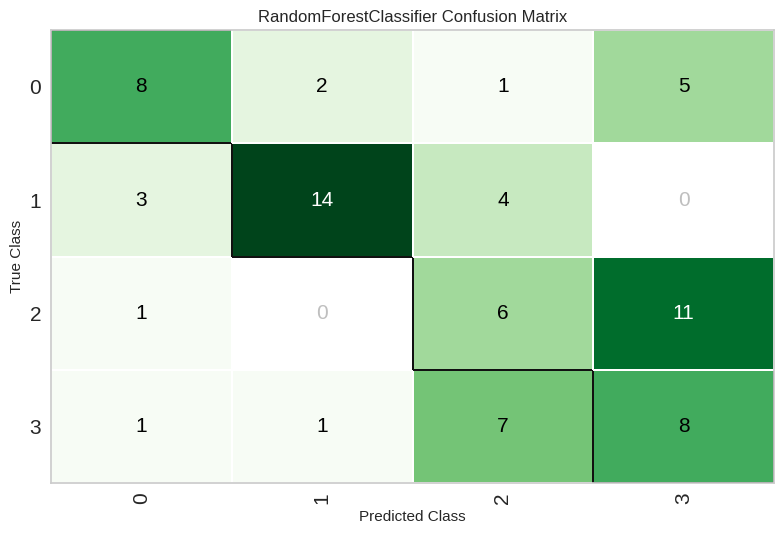

In [190]:
plot_model(rf, plot = 'confusion_matrix')

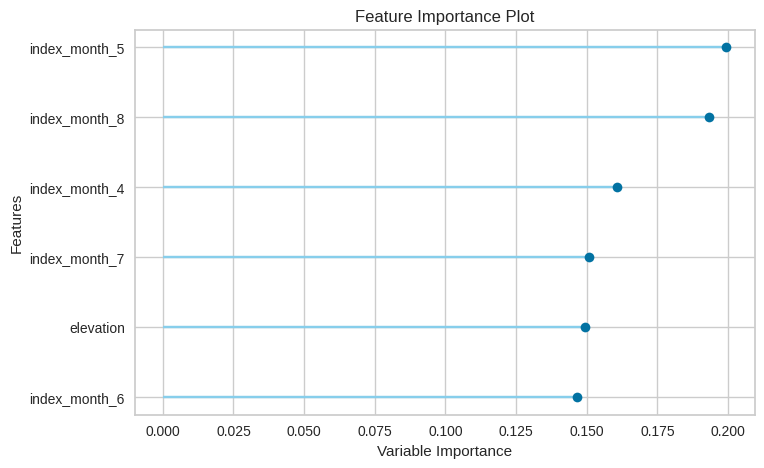

In [ ]:
plot_model(rf, plot = 'feature')

In [145]:
pred_holdouts = predict_model(gbc_tuned)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.3692,0.6480,0.3692,0.3569,0.3625,0.1873,0.1877


,index_month_4,index_month_5,index_month_6,index_month_7,index_month_8,elevation,culture_name,prediction_label,prediction_score
105,-0.105,-0.1280,0.166,0.020,-0.305,754,3,3,0.6239
222,0.011,0.0122,0.032,0.054,0.022,720,3,0,0.8940
110,0.035,0.0200,0.040,-0.039,0.020,763,2,4,0.4189
162,-0.084,0.1920,-0.219,0.365,0.371,657,3,1,0.6456
192,0.006,-0.0180,0.004,0.200,0.014,868,2,0,0.4733


In [146]:
pred_holdouts = predict_model(xgboost)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.2769,0.6641,0.2769,0.2721,0.2718,0.0748,0.0752


,index_month_4,index_month_5,index_month_6,index_month_7,index_month_8,elevation,culture_name,prediction_label,prediction_score
105,-0.105,-0.1280,0.166,0.020,-0.305,754,3,3,0.8728
222,0.011,0.0122,0.032,0.054,0.022,720,3,0,0.7097
110,0.035,0.0200,0.040,-0.039,0.020,763,2,0,0.4914
162,-0.084,0.1920,-0.219,0.365,0.371,657,3,1,0.6672
192,0.006,-0.0180,0.004,0.200,0.014,868,2,3,0.3697


In [191]:
modelrf = finalize_model(rf_tuned)

In [203]:
pred_holdouts = predict_model(modelrf)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9306,0.9865,0.9306,0.9311,0.9290,0.9069,0.9081


,index_month_4,index_month_5,index_month_6,index_month_7,index_month_8,elevation,culture_name,prediction_label,prediction_score
158,-0.041,0.198,0.070,0.184,-0.088,633,0,0,0.7623
185,-0.084,0.192,-0.219,0.365,0.371,657,3,3,0.7616
67,0.017,-0.237,-0.048,0.129,-0.129,584,2,2,0.6854
21,0.087,0.059,0.002,0.100,-0.058,791,2,2,0.8234
0,-0.047,-0.298,-0.293,0.148,0.105,724,0,3,0.3119


In [ ]:
df_woutanns['culture_name'].value_counts()

2    72
3    60
4    56
0    54
1    27
7     9
Name: culture_name, dtype: int64

In [206]:
save_model(modelrf, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['index_month_4', 'index_month_5',
                                              'index_month_6', 'index_month_7',
                                              'index_month_8', 'elevation'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
                                         max_depth=9, max_features='log2',
                                         max_leaf_nodes=None, max_s

In [212]:
from pycaret.classification import * 
import pandas as pd
from sklearn.metrics import classification_report

In [213]:
loaded_bestmodel = load_model('best-model')

Transformation Pipeline and Model Successfully Loaded


In [216]:
y_pred = loaded_bestmodel.predict(pd.DataFrame(clf_setup.X_train))

In [221]:
y_true = clf_setup.y_train

In [226]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           2       0.88      0.96      0.92        48
           3       0.93      0.90      0.92        42
           4       0.97      0.87      0.92        38

    accuracy                           0.92       166
   macro avg       0.92      0.91      0.92       166
weighted avg       0.92      0.92      0.92       166



In [363]:
dat = clf_setup.X_train[3:5:]

In [289]:
pred_class = loaded_bestmodel.predict(dat)
pred_class

0    0
Name: culture_name, dtype: int8

In [290]:
loaded_bestmodel.predict_proba(dat)

array([[0.81404762, 0.18039683, 0.        , 0.00555556]])

In [346]:
culture_class = [0, None, 1, 2, 3]

In [372]:
test_data = clf_setup.X_test.reset_index(drop=True)

In [386]:
loaded_bestmodel.predict(test_data[:1:])
loaded_bestmodel.predict_proba(test_data[:1:])[:,]

array([[0.76231602, 0.16300974, 0.06412879, 0.01054545]])

In [394]:
proba_list = []
for i in range(len(test_data)):
    predicted = loaded_bestmodel.predict(test_data[i:i+1])[0]
    proba = loaded_bestmodel.predict_proba(test_data[i:i+1])[:,culture_class[predicted]]
    proba_list.append(proba[0])

In [397]:
test_data

,index_month_4,index_month_5,index_month_6,index_month_7,index_month_8,elevation,culture_name,predicted_culture,proba %
0,-0.041,0.198,0.070,0.1840,-0.088,633,0.0,0,0.762316
1,-0.084,0.192,-0.219,0.3650,0.371,657,NaN,3,0.761567
2,0.017,-0.237,-0.048,0.1290,-0.129,584,2.0,2,0.685397
3,0.087,0.059,0.002,0.1000,-0.058,791,NaN,2,0.823373
4,-0.047,-0.298,-0.293,0.1480,0.105,724,NaN,3,0.311882
...,...,...,...,...,...,...,...,...,...
67,0.125,0.473,-0.219,-0.2010,-0.109,658,2.0,2,0.813849
68,0.047,-0.057,0.176,0.0850,0.339,634,NaN,3,0.717917
69,0.065,0.276,0.095,0.0812,-0.154,1078,NaN,2,0.544444
70,0.115,0.676,-0.262,0.1750,-0.127,620,NaN,2,0.912361


In [399]:
test_data = clf_setup.X_test
test_data['culture_name'] = clf_setup.y_test
test_data = test_data.reset_index(drop=True)
test_data['predicted_culture'] = pd.DataFrame(loaded_bestmodel.predict(test_data.drop(columns=['culture_name'])))
test_data['proba %'] = pd.DataFrame(proba_list)
test_data['true_false'] = test_data['culture_name'] == test_data['predicted_culture']

In [431]:
len(test_data[(test_data['proba %'] < 0.30) & (test_data['true_false'] == True)])

1

In [430]:
len(test_data[(test_data['proba %'] < 0.30) & (test_data['true_false'] == False)])

1

In [432]:
test_data

,index_month_4,index_month_5,index_month_6,index_month_7,index_month_8,elevation,culture_name,predicted_culture,proba %,true_false
0,-0.041,0.198,0.070,0.1840,-0.088,633,0,0,0.762316,True
1,-0.084,0.192,-0.219,0.3650,0.371,657,3,3,0.761567,True
2,0.017,-0.237,-0.048,0.1290,-0.129,584,2,2,0.685397,True
3,0.087,0.059,0.002,0.1000,-0.058,791,2,2,0.823373,True
4,-0.047,-0.298,-0.293,0.1480,0.105,724,0,3,0.311882,False
...,...,...,...,...,...,...,...,...,...,...
67,0.125,0.473,-0.219,-0.2010,-0.109,658,2,2,0.813849,True
68,0.047,-0.057,0.176,0.0850,0.339,634,3,3,0.717917,True
69,0.065,0.276,0.095,0.0812,-0.154,1078,2,2,0.544444,True
70,0.115,0.676,-0.262,0.1750,-0.127,620,2,2,0.912361,True
